<a href="https://colab.research.google.com/github/shakin-shahria/-ImageForge-PyML-Utility/blob/main/Image_Classification_using_ANN_(DIP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###Image classification in ANN

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt



In [2]:
mnist = tf.keras.datasets.mnist ## Gettinff the dataset from mnist

(x_train, y_train), (x_test,y_test) = mnist.load_data()

x_train, x_test = x_train/ 255.0 , x_test/ 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)


In [3]:
model = tf.keras.models.Sequential([



  tf.keras.layers.Flatten(input_shape=(28,28)), #This is  the first input layer of my model

  tf.keras.layers.Dense(128,activation = 'relu'), #These are the hidden layers

  tf.keras.layers.Dropout(0.2), # Droping out the neurons that are not effecting the accuracy of the model

  tf.keras.layers.Dense(10,activation = 'softmax') # This is the last hidden layer of the model

])




In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [6]:
r = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2961 - accuracy: 0.9129 - val_loss: 0.1368 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1421 - accuracy: 0.9577 - val_loss: 0.1006 - val_accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1067 - accuracy: 0.9677 - val_loss: 0.0885 - val_accuracy: 0.9721
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0895 - accuracy: 0.9723 - val_loss: 0.0753 - val_accuracy: 0.9766
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.0730 - val_accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0677 - accuracy: 0.9780 - val_loss: 0.0763 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0584 - accuracy: 0.9805 - val_loss: 0.0701 - val_accurac

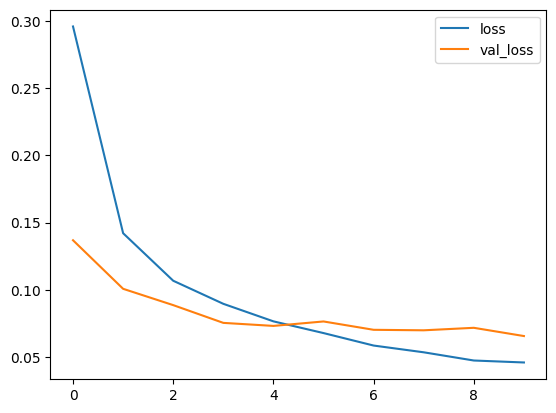

In [7]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

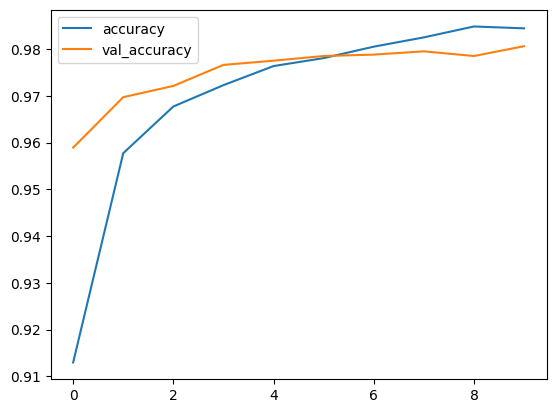

In [8]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [9]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9806
[0.06545136123895645, 0.9805999994277954]


313/313 [==============================] - 1s 3ms/step
Confusion matrix without normalization
[[ 968    1    0    1    0    1    5    2    2    0]
 [   0 1124    2    1    0    1    2    0    5    0]
 [   3    2 1013    1    0    0    3    5    4    1]
 [   0    0    3  987    0    7    0    5    5    3]
 [   0    0    3    0  966    0    6    0    2    5]
 [   1    1    0    8    1  872    5    0    3    1]
 [   4    2    0    1    1    3  945    0    2    0]
 [   1    5    9    0    1    0    0 1005    2    5]
 [   4    0    4    4    5    1    1    3  948    4]
 [   2    3    0    6    8    4    0    7    1  978]]


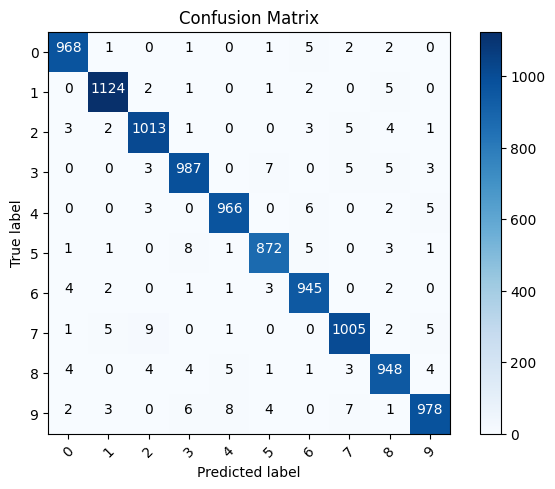

In [24]:
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(

                      cm,classes,
                      normalize = False,
                        title = "Confusion Matrix",
                        cmap = plt.cm.Blues):


                if normalize:
                   cm = cm.astype('float') /cm.sum(axis = 1) [:, np.newaxis]
                   print("Normalixe Confusion Matrix")
                else:
                  print("Confusion matrix without normalization")

                print(cm)
                plt.imshow(cm,interpolation='nearest', cmap =cmap)
                plt.title(title)
                plt.colorbar()
                tick_marks = np.arange(len(classes))
                plt.xticks(tick_marks,classes, rotation = 45)
                plt.yticks(tick_marks,classes)

                fmt = '.2f' if normalize else 'd'
                thresh = cm.max() / 2.
                for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                  plt.text(j,i, format(cm[i,j],fmt),
                           horizontalalignment = 'center',
                           color = "white" if cm[i,j]> thresh else "black")
                plt.tight_layout()
                plt.ylabel('True label')
                plt.xlabel('Predicted label')
                plt.show()

p_test = model.predict(x_test). argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm,list(range(10)))


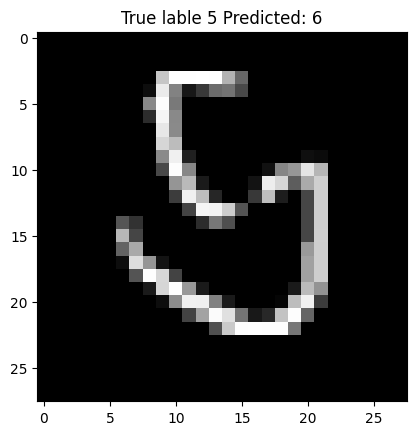

In [26]:

misclassified_idx = np.where(p_test != y_test) [0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True lable %s Predicted: %s" % (y_test[i], p_test[i]));